Columns in dataset: Index(['Month', 'Champagne sales'], dtype='object')


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\CHARUSAT\AppData\Local\Temp\ipykernel_16204\198988554.py:32: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(df.index[-1], periods=13, freq='M')[1:], forecast, label="Forecast", linestyle='dashed', marker='o', color='red')


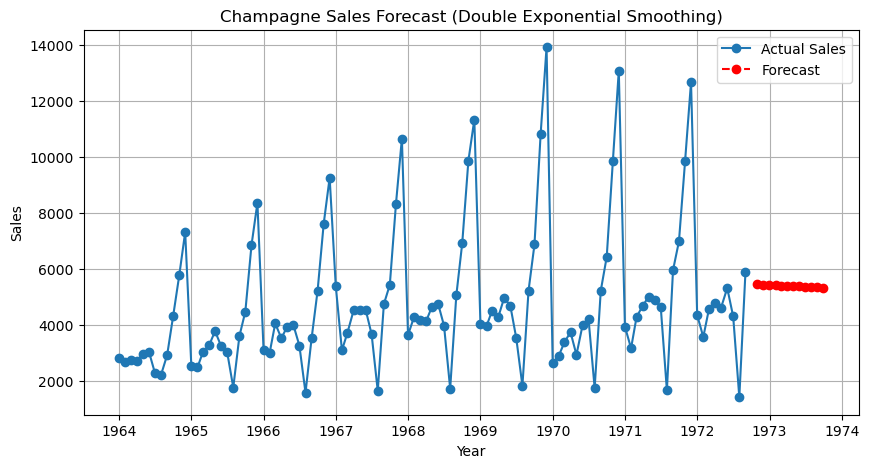

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load dataset (Fixing File Path Issue)
file_path = r"C:\Users\CHARUSAT\Documents\Business_forecasting\Champaigne Sales.csv"
df = pd.read_csv(file_path)

# Check column names
print("Columns in dataset:", df.columns)

# Standardize column names (Fix spacing and case)
df.columns = df.columns.str.strip().str.lower()

# Check if the expected columns exist
if 'month' not in df.columns or 'champagne sales' not in df.columns:
    raise KeyError("Check your column names! Expected 'Month' and 'Champagne Sales'.")

# Convert Month column to datetime and set as index
df['month'] = pd.to_datetime(df['month'])
df.set_index('month', inplace=True)

# Apply Double Exponential Smoothing Model
model = ExponentialSmoothing(df['champagne sales'], trend="add", seasonal=None).fit()

# Forecast next 12 months
forecast = model.forecast(12)

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['champagne sales'], label="Actual Sales", marker='o')
plt.plot(pd.date_range(df.index[-1], periods=13, freq='M')[1:], forecast, label="Forecast", linestyle='dashed', marker='o', color='red')
plt.legend()
plt.title("Champagne Sales Forecast (Double Exponential Smoothing)")
plt.xlabel("Year")
plt.ylabel("Sales")
plt.grid()
plt.show()
